# Notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from src.util import load_star_galaxy_dataset

## Data

Let's first load the dataset.

In [2]:
star_galaxy = load_star_galaxy_dataset()
print(star_galaxy.DESCR)

This is a simple dataset consisting of ~3000 64x64 images of stars and ~1000 images of galaxies. The images were captured by the in-house 1.3m telescope of the observatory situated in Devasthal, Nainital, India.


Now, let's take a peek at some of the images in the dataset.

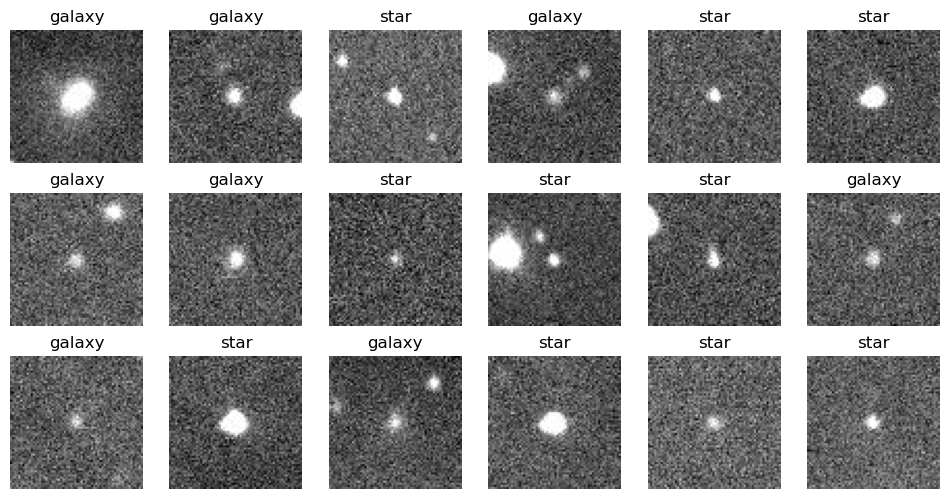

In [3]:
w, h = 6, 3

_, axs_list = plt.subplots(h, w, figsize=(2 * w, 2 * h))

_i = 0
indices = np.random.choice(len(star_galaxy.data), size=(h * w))
for axs in axs_list:
    for ax in axs:
        i = indices[_i]
        ax.axis("off")
        img = star_galaxy.data[i].reshape((64, 64))
        ax.imshow(img, cmap="gray")
        ax.set_title(star_galaxy.target_names[star_galaxy.target[i]])
        _i += 1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    star_galaxy.data,
    star_galaxy.target,
    test_size=0.3,
)

## KNN
Let's first look at K-Nearest Neighbor classification.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [6]:
predictions = knn_model.predict(X_test)

In [7]:
def display_scores(model):
    predictions = model.predict(X_test)
    print(
        classification_report(
            y_true=y_test,
            y_pred=predictions,
            target_names=star_galaxy.target_names,
        )
    )
    C = confusion_matrix(
        y_true=y_test,
        y_pred=predictions,
        normalize="true",
    )
    print(f"true negatives: {C[0,0]}")
    print(f"false negatives: {C[1,0]}")
    print(f"true positives: {C[1,1]}")
    print(f"false positives: {C[0,1]}")


display_scores(model=knn_model)

              precision    recall  f1-score   support

        star       0.80      0.85      0.82       912
      galaxy       0.38      0.30      0.34       284

    accuracy                           0.72      1196
   macro avg       0.59      0.57      0.58      1196
weighted avg       0.70      0.72      0.71      1196

true negatives: 0.8453947368421053
false negatives: 0.6971830985915493
true positives: 0.3028169014084507
false positives: 0.15460526315789475


In [8]:
error_rates = []
knn_models = []
k_range = np.arange(1, 35)
for k_neighbors in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    error_rates.append(np.mean(predictions != y_test))
    knn_models.append(knn_model)

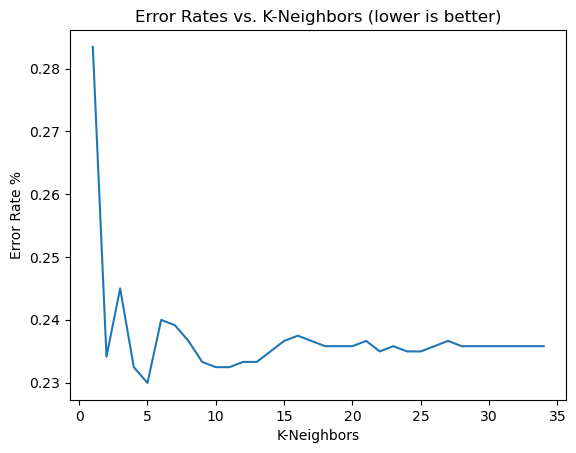

In [9]:
plt.title("Error Rates vs. K-Neighbors (lower is better)")
plt.xlabel("K-Neighbors")
plt.ylabel("Error Rate %")
plt.plot(k_range, error_rates)

In [11]:
i = np.where(error_rates == np.min(error_rates))[0][0]  # index of minimum
min_err = error_rates[i]  # Minimum error rate
k = i + 1  # K neighbors
print(f"Minimum error rate is {min_err}, with {k} neighbors")
print(f"Average error rate is {np.average(error_rates)}")
print()
print("Scores for minimum model:")
display_scores(knn_models[i])

Minimum error rate is 0.229933110367893, with 5 neighbors
Average error rate is 0.23701554200275432

Scores for minimum model:
              precision    recall  f1-score   support

        star       0.79      0.96      0.86       912
      galaxy       0.55      0.17      0.26       284

    accuracy                           0.77      1196
   macro avg       0.67      0.56      0.56      1196
weighted avg       0.73      0.77      0.72      1196

true negatives: 0.9572368421052632
false negatives: 0.8309859154929577
true positives: 0.16901408450704225
false positives: 0.04276315789473684
